In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import matplotlib
from numpy import linalg as LA

Text(0, 0.5, '$\\epsilon(x)$')

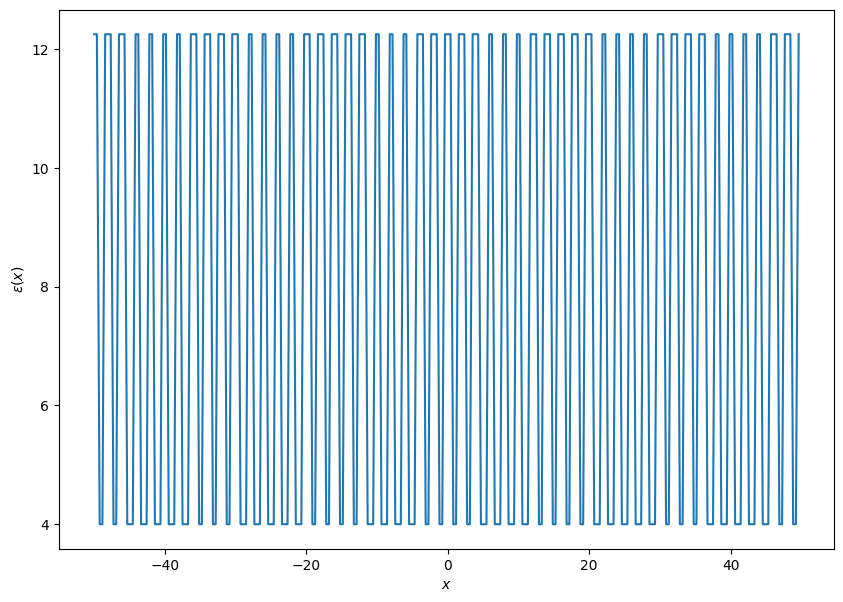

In [161]:
nx = 2**8# number of sampling points of a single unit cell
L=50 #  half of the total len of the lattic
dx = 2*L/nx # space increment
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
d=1
aa=1


def periodicf(lid,lfd,f,x):
    if x>=lid and x<=lfd :
        return er1
    if ((x>=lfd and x<=(lfd+2*aa)) or (x<=lid and x>=(lid-2*aa))) :
        return f(x)
    elif x>(lfd+2*aa):
        x_new=x-(2*aa)
        return periodicf(li,lf,f,x_new)
    elif x<(lid-2*aa):
        
        x_new=x+(2*aa)
        return periodicf(li,lf,f,x_new)
    
def squareP(li,lf,x):
    return periodicf(li,lf,square,x)
 
# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)>(lf+aa):
        return er1
    else:
        return er2

li = -d/2
lf = d/2
lon=1
x_cell =np.arange(-L*lon,L*lon,dx) # spatial sampling # sampling points in the unit cell
e_cell = [squareP(li,lf,xi) for xi in x_cell]  #Dielectric function


f=plt.figure(figsize=(10,7))

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
font = {'weight' : 'bold',
        'size'   : 27}

plt.plot(x_cell,e_cell)
plt.xlabel('$x$')
plt.ylabel(r'$\epsilon(x)$')




In [162]:
D0 = np.diag([-2]*nx, 0) + np.diag([1]*(nx-1), -1) + np.diag([1]*(nx-1), 1)
D0 = D0 @ np.diag(np.array(e_cell)**-1) * dx**-2
w, v = LA.eig(D0)
w_sort=np.sort(w)
inds = w.argsort()
eigenvecs =v[inds]

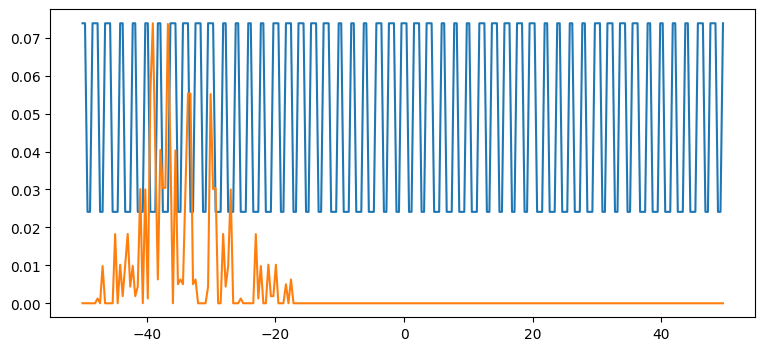

In [164]:
f=plt.figure(figsize=(20,4))
plt.subplot(121)
n=1
vec=np.abs(eigenvecs[:,n])**2
plt.plot(x_cell,np.array(e_cell)/max(e_cell)*max(vec))
plt.plot(x_cell,vec)


Text(0, 0.5, '$\\omega_{i}/(2\\pi c)$')

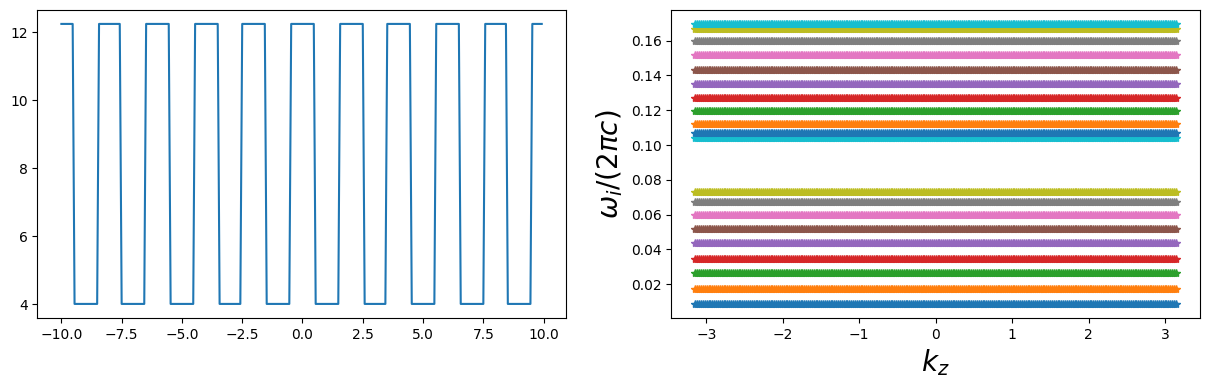

In [87]:
f=plt.figure(figsize=(15,4))
plt.subplot(121)

plt.plot(x_cell,e_cell)

plt.subplot(122)

for i in range(0,20):
    plt.plot(kx,omega[i,:]/(2*np.pi),marker='*')

plt.xlabel('$k_{z}$',size=20)
plt.ylabel(r'$\omega_{i}/(2\pi c)$',size=20)
